In [2]:
# Add project path to the PYTHONPATH

import os
import sys
from pathlib import Path

sys.path.append(Path(os.path.join(os.path.abspath(''), '../')).resolve().as_posix())

In [3]:
import pickle

In [4]:
tokenizer_path = Path('/home/rmohashi/hd/emotion/tokenizer.pickle').resolve()
with tokenizer_path.open('rb') as file:
    tokenizer = pickle.load(file)

In [5]:
from emotion_recognition.models.cnn_model import cnn_model as ml_model

/home/rmohashi/miniconda3/envs/emodata/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rmohashi/miniconda3/envs/emodata/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rmohashi/miniconda3/envs/emodata/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rmohashi/miniconda3/envs/emo

In [7]:
model_weights_path = Path('/home/rmohashi/hd/tweet-emotion-recognition/models/emotion_recognition/checkpoints/NE/cnn_100_30_ne/cnn_100_30_02-0.5082.h5').resolve()
input_dim = min(tokenizer.num_words, len(tokenizer.word_index) + 1)
model = ml_model(30, input_dim, 4, None, embedding_dim=100)
model.load_weights(model_weights_path.as_posix())

In [8]:
import pandas as pd

In [9]:
test_data_path = Path('/home/rmohashi/hd/sentiment140/test_data.csv').resolve()
test_data = pd.read_csv(test_data_path)

In [10]:
test_data.head()

,label,id,date,query,user,text
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...


In [11]:
encoder_path = Path('../models/emotion_recognition/encoder.pickle').resolve()
with encoder_path.open('rb') as file:
    encoder = pickle.load(file)

In [12]:
from nlp.utils import preprocess
from tensorflow.keras.preprocessing.sequence import pad_sequences

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/rmohashi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
test_data['cleaned'] = preprocess(test_data.text, stemming=True)
sequences = [text.split() for text in test_data.cleaned]
list_tokenized = tokenizer.texts_to_sequences(sequences)
x_test = pad_sequences(list_tokenized, maxlen=30)
y_test = encoder.transform(test_data.label)

Time to clean up: 0.13 sec


/home/rmohashi/miniconda3/envs/emodata/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [16]:
y_pred = model.predict(x_test)
y_pred = y_pred.argmax(axis=1)

In [15]:
import seaborn as sns

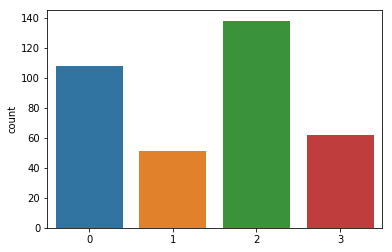

In [17]:
sns.countplot(y_pred)

In [18]:
encoder.classes_

array(['angry', 'fear', 'joy', 'sadness'], dtype='<U7')